# Linear Regression and Multiple Linear Regression

- Linear regression only has one independent variable, while Multiple Linear Regression has multiple independent variables (x)

- This model trains the slope and intercept parameters based on training data

$$
y = mx + b
$$

- This model assumes a Linear relationship between independent and dependent variables
 

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd

lm = LinearRegression()


In [3]:
def download_data(url):
    return pd.read_csv(url)

df = download_data("http://dataworkshop123.s3.amazonaws.com/train.csv")
X = df[['LotArea']]
Y = df[['SalePrice']]

In [4]:
lm.fit(X, Y)

# X must be of equal shape of training data
yhat = lm.predict(X)

In [5]:
yhat

array([[176580.91488881],
       [178995.88263327],
       [182460.83635359],
       ...,
       [177824.09828422],
       [179241.57935162],
       [179703.573181  ]])

In [6]:
print(f"Intercept: {lm.intercept_}")
print(f"Slope: {lm.coef_}")

Intercept: [158836.15189688]
Slope: [[2.09997195]]


### Multiple Linear Regression

$$
y = b + m_{1}x_{1} + m_{2}x_{2} ...
$$

In [7]:
X = df[['LotArea', 'OverallQual']]
Y = df[['SalePrice']]

In [8]:
lm_multi = LinearRegression()
lm_multi.fit(X, Y)
yhat_multi = lm_multi.predict(X)
yhat_multi

array([[217850.08757227],
       [175189.2166501 ],
       [221910.36817722],
       ...,
       [218708.54690017],
       [131030.39220476],
       [131349.41425229]])

<AxesSubplot: xlabel='OverallQual'>

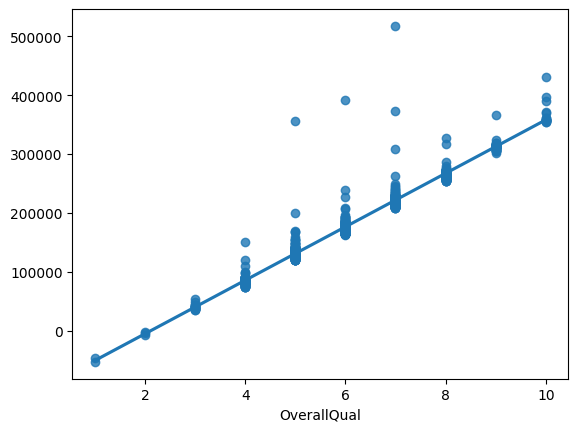

In [9]:
import seaborn as sns
sns.regplot(x=X[['OverallQual']], y=yhat_multi)

<AxesSubplot: xlabel='OverallQual'>

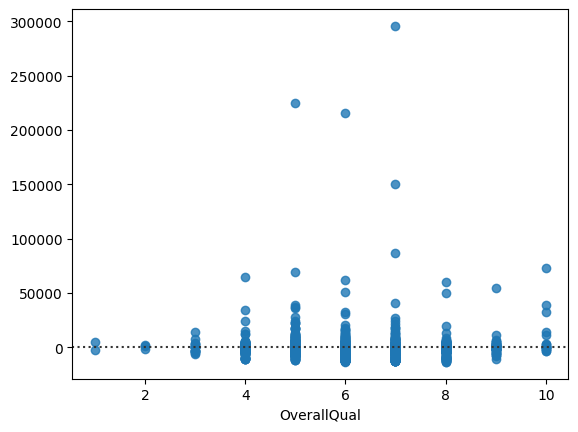

In [10]:
sns.residplot(x=X[['OverallQual']], y=yhat_multi)

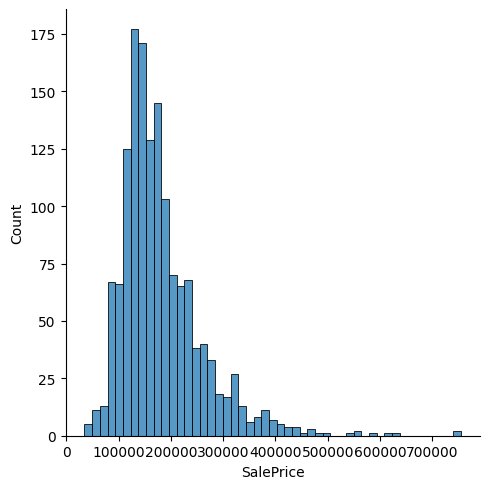

In [11]:
# ax1 = sns.displot(Y, color="r", label="Target Values")
sns.displot(data=df, x='SalePrice', kind='hist')


/var/folders/1k/qg7m3bp97p19dr93jjc8s6x40000gn/T/ipykernel_9497/2280715671.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax1 = sns.kdeplot(data=df, x='SalePrice', shade=True)


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

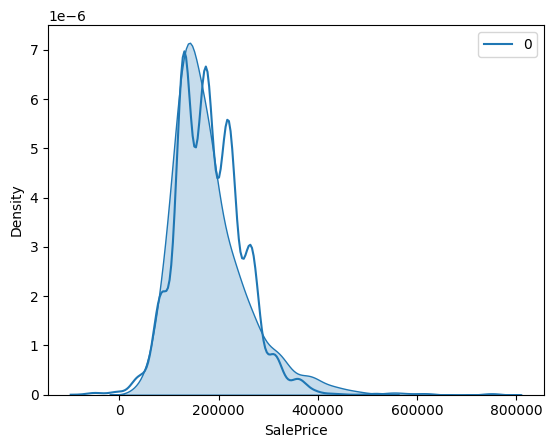

In [12]:
ax1 = sns.kdeplot(data=df, x='SalePrice', shade=True)
sns.kdeplot(data=yhat_multi, ax=ax1, )


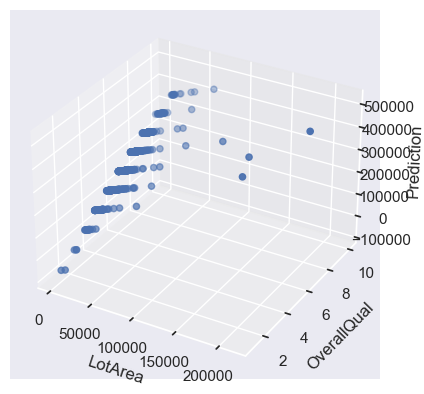

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = X[['LotArea']]
y = X[['OverallQual']]
z = yhat_multi

ax.set_xlabel("LotArea")
ax.set_ylabel("OverallQual")
ax.set_zlabel("Prediction")

ax.scatter(x, y, z)
ax.plot_surface(x, y, np.full_like(z, ax.get_zlim()[0]), alpha = 1)
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y['SalePrice'], yhat_multi)

2153929600.8390236

In [15]:
mean_squared_error(Y['SalePrice'], yhat)

5867752122.509074

In [18]:
## R^2 - How much of the variance can be explained by the model
lm_multi.score(df[['LotArea', 'OverallQual']], yhat_multi)

1.0

How can we make sure this model is the best one for this data?

- See if predictions make sense
- Numerical Evaluations
- Visualization
- Try different models

## Pipelines

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, Y)
yhat_pipe=pipe.predict(X)


In [22]:
yhat_pipe

array([[206749.65717577],
       [163637.94037834],
       [215148.45389851],
       ...,
       [208543.17920502],
       [129861.3907752 ],
       [130565.10476778]])

In [27]:
test_df = download_data("http://dataworkshop123.s3.amazonaws.com/test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [24]:
yhat_test = pipe.predict(test_df[['LotArea', 'OverallQual']])

### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm_multi, X, Y, cv=3)


In [31]:
np.mean(scores)

0.6366311045985472

### Hyperparameter Optimization (Grid Search)

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters1=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]

ridge=Ridge()

grid = GridSearchCV(ridge, parameters1, cv=3)
grid.fit(X, Y)

grid.best_estimator_

scores=grid.cv_results_
scores['mean_test_score']

array([0.63663108, 0.63663089, 0.63662891, 0.63660906, 0.63639557,
       0.63292766, 0.54668871, 0.16864958])

In [34]:
scores


{'mean_fit_time': array([0.00466188, 0.00133459, 0.00130717, 0.00144609, 0.00136606,
        0.00118343, 0.00118295, 0.00135922]),
 'std_fit_time': array([4.03638613e-03, 9.58348449e-05, 8.73849538e-05, 3.12089121e-04,
        1.80826552e-04, 9.76112438e-05, 9.17999943e-05, 1.93129743e-04]),
 'mean_score_time': array([0.00114584, 0.00085306, 0.0010163 , 0.0008258 , 0.00084631,
        0.00078924, 0.00087635, 0.00084241]),
 'std_score_time': array([1.65699826e-04, 2.00536341e-05, 1.46040457e-04, 8.96811696e-06,
        2.42940096e-05, 1.12374736e-05, 1.47580566e-04, 3.53933610e-05]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 10000}],
 'split0_test_score': array([0.63141039, 0.6